In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

In [3]:
# Cargar el dataset
data = pd.read_csv("/content/data_proyecto.csv")

In [4]:
# Renombrar las columnas
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary']

In [5]:
# Limpiar y preprocesar los datos
data["age"] = data["age"].fillna(data["age"].median())
data.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'country'], axis=1, inplace=True)
data = pd.get_dummies(data, columns=['race', 'sex'], drop_first=True)
data['salary'] = data['salary'].apply(lambda x: 1 if x == '>50K' else 0)

In [6]:
# Separar características y variable objetivo
X = data.drop('salary', axis=1).values
y = data['salary'].values

In [7]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [8]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Función para entrenar y evaluar SVM con diferentes kernels
def entrenar_svm(kernel):
    print(f"\nKernel: {kernel}")

    # Crear y entrenar el modelo SVM
    model = svm.SVC(kernel=kernel, C=1.0, gamma='auto')
    model.fit(X_train, y_train)

    # Guardar el modelo entrenado
    pkl_filename = f"svm_{kernel}_model.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(model, file)

    # Evaluar el modelo
    score = model.score(X_test, y_test)
    print(f"Test Accuracy: {score:.4f}")

    # Predicciones y matriz de confusión
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot()
    plt.title(f'Matriz de Confusión - Kernel {kernel}')
    plt.show()

    # Reporte de clasificación
    print(classification_report(y_test, y_pred))


Kernel: linear
Test Accuracy: 0.8150


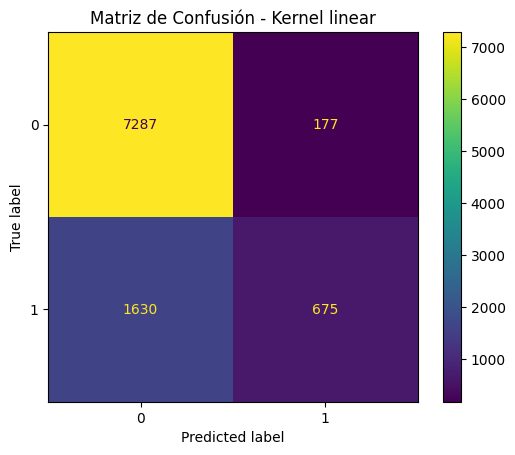

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7464
           1       0.79      0.29      0.43      2305

    accuracy                           0.82      9769
   macro avg       0.80      0.63      0.66      9769
weighted avg       0.81      0.82      0.78      9769



In [12]:
# Probar el modelo con kernel lineal
entrenar_svm('linear')


Kernel: poly
Test Accuracy: 0.8248


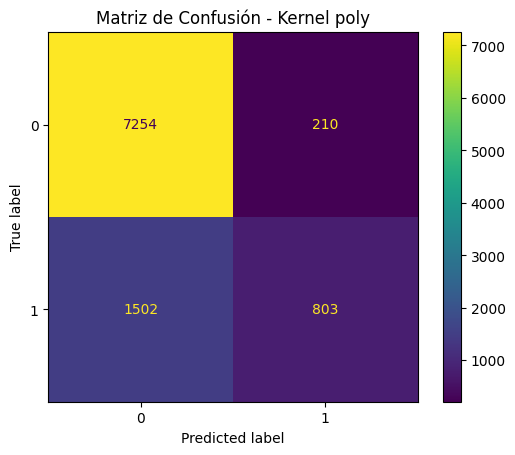

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      7464
           1       0.79      0.35      0.48      2305

    accuracy                           0.82      9769
   macro avg       0.81      0.66      0.69      9769
weighted avg       0.82      0.82      0.80      9769



In [13]:
# Probar el modelo con kernel polinómico
entrenar_svm('poly')


Kernel: rbf
Test Accuracy: 0.8397


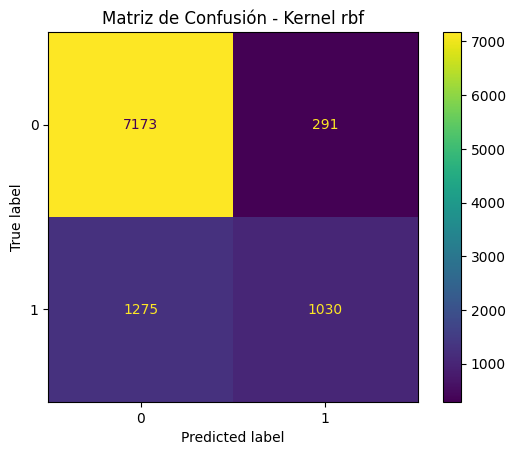

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7464
           1       0.78      0.45      0.57      2305

    accuracy                           0.84      9769
   macro avg       0.81      0.70      0.73      9769
weighted avg       0.83      0.84      0.82      9769



In [14]:
# Probar el modelo con kernel RBF
entrenar_svm('rbf')


Kernel: sigmoid
Test Accuracy: 0.7460


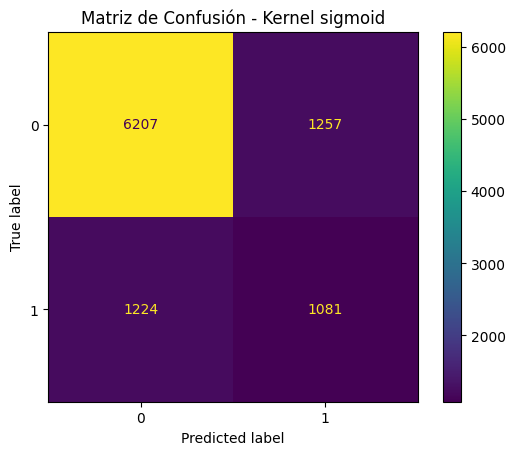

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      7464
           1       0.46      0.47      0.47      2305

    accuracy                           0.75      9769
   macro avg       0.65      0.65      0.65      9769
weighted avg       0.75      0.75      0.75      9769



In [15]:
# Probar el modelo con kernel sigmoide
entrenar_svm('sigmoid')

In [17]:
# Ejemplo de predicción con un nuevo dato
x_in = np.asarray([45, 15000, 0, 40, 40, 12, 35, 0, 0, 0, 0]).reshape(1, -1)  # Add missing features with value 0
x_in = scaler.transform(x_in)
kernel_to_use = 'linear'  # Cambia el kernel si quieres usar otro modelo

In [18]:
# Cargar el modelo entrenado
pkl_filename = f"svm_{kernel_to_use}_model.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [19]:
# Realizar predicción
prediccion = model.predict(x_in)
print(f"Predicción para la nueva muestra: {'>50K' if prediccion[0] == 1 else '<=50K'}")

Predicción para la nueva muestra: >50K
